In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# Generate the data
start_date = '2019-01-01'
end_date = '2022-01-01'

dates = pd.date_range(start=start_date, end=end_date, freq='D')
unix_dates = np.array([int(pd.Timestamp(d).timestamp()) for d in dates])
freq = 'D'  
date_rng = pd.date_range(start=start_date, end=end_date, freq=freq)
prices = np.sin(unix_dates)
data = pd.DataFrame({'ds': date_rng, 'y': prices})

# Prepare data
data['ds_numeric'] = data['ds'].apply(lambda x: x.value)  # Convert dates to numeric

In [28]:
X = data[['ds_numeric']]  # Input features
y = data['y']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = False)

In [29]:
X_train

,ds_numeric
0,1546300800000000000
1,1546387200000000000
2,1546473600000000000
3,1546560000000000000
4,1546646400000000000
...,...
872,1621641600000000000
873,1621728000000000000
874,1621814400000000000
875,1621900800000000000


In [42]:
y_train

0     -0.885371
1     -0.920145
2     -0.948861
3     -0.971331
4     -0.987407
         ...   
872   -0.388192
873   -0.312202
874   -0.234156
875   -0.154569
876   -0.073965
Name: y, Length: 877, dtype: float64

In [43]:
# Train the decision tree model
model = DecisionTreeRegressor()
model.fit(X_train.values, y_train.values)

DecisionTreeRegressor()

In [45]:
# Make predictions
y_pred = model.predict(X_test.values)

In [46]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.5209348099557879


In [47]:
len(y_pred)

220

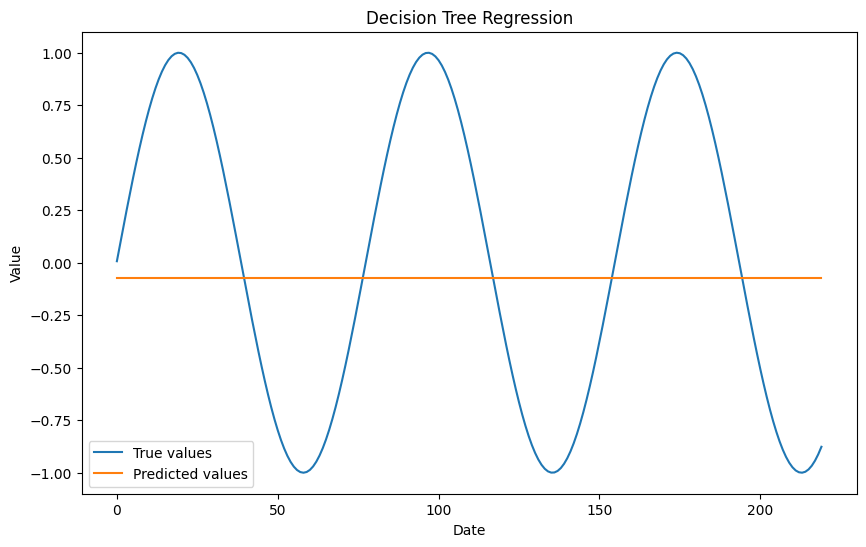

In [48]:
# Plot predictions
plt.figure(figsize=(10, 6))
plt.plot(data['y'][-len(y_pred):].values, label='True values')
#plt.plot(X_test['ds_numeric'], y_pred, label='Predicted values')
plt.plot(y_pred, label='Predicted values')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()

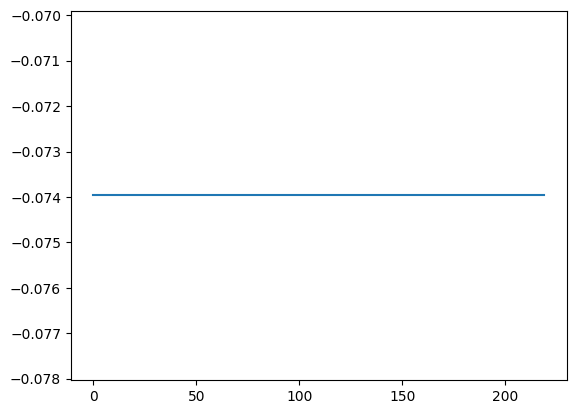

In [41]:
plt.plot(y_pred, label='Predicted values')